In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# SELLER P&L ANALYSIS

🎯 The goal of this exercise is to compute the P&L associated to each seller  

For each `seller_id` we need three items:  

- The **revenue**:
 - 10% fee on sales
 - 80 BRL per month on Olist


- The **cost**:
 - Review cost according to `{1: 100, 2: 50, 3: 40, 4: 0, 5: 0}` with review score as key and cost in BRL as value


- The **profit** made by Olist

💡 Let's not start from scratch  
❓ Import your seller training set and investigate what you already have.


In [2]:
from olist.seller import Seller
sellers = Seller().get_training_data()

In [5]:
print(sellers.shape)
sellers.head()

(2967, 15)


,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_stars,share_of_one_stars
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,3.000000,1,1
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,4.560976,30,2
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,5.000000,1,0
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,5.000000,1,0
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0,1


❓ What is missing?  
Write down a strategy to get your missing columns  
Re-use as much of what has already been coded in `seller.py` as possible

- Take 10% of sales as olist revenue
- get the revenue of 80BRL / month
- Sum olist total revenue per seller
- Add the cost column mapping the review score to the actual loss
- Calculate the profit

In [6]:
sellers['revenue'] = sellers.months_on_olist * 80 + sellers.sales*0.1

In [7]:
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_stars,share_of_one_stars,revenue
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,3.000000,1,1,341.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,4.560976,30,2,2290.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,5.000000,1,0,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,5.000000,1,0,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0,1,16.799


In [9]:
from olist.data import Olist
data = Olist().get_data()

In [10]:
df = data['order_items'][['order_id', 'seller_id']].merge(
            data['order_reviews'][['order_id', 'review_score']],
            on='order_id').drop(columns='order_id')

In [12]:
print(df.shape)
df.head()

(112372, 2)


,seller_id,review_score
0,48436dade18ac8b2bce089ec2a041202,5
1,dd7ddc04e1b6c2c614352b383efe2d36,4
2,5b51032eddd242adc84c38acab88f23d,5
3,9d7a1d34a5052409006425275ba1c2b4,4
4,df560393f3a51e74553ab94004ba5c87,5


In [13]:
df['cost'] = df['review_score'].map({1: 100, 2: 50, 3: 40, 4: 0, 5: 0})

In [14]:
df.head()

,seller_id,review_score,cost
0,48436dade18ac8b2bce089ec2a041202,5,0
1,dd7ddc04e1b6c2c614352b383efe2d36,4,0
2,5b51032eddd242adc84c38acab88f23d,5,0
3,9d7a1d34a5052409006425275ba1c2b4,4,0
4,df560393f3a51e74553ab94004ba5c87,5,0


In [15]:
df.groupby('seller_id', as_index=False).sum()

,seller_id,review_score,cost
0,0015a82c2db000af6aaaf3ae2ecb0532,11,100
1,001cca7ae9ae17fb1caed9dfb1094831,921,4750
2,001e6ad469a905060d959994f1b41e4f,1,100
3,002100f778ceb8431b7a1020ff7ab48f,223,1110
4,003554e2dce176b5555353e4f3555ac8,5,0
...,...,...,...
3085,ffcfefa19b08742c5d315f2791395ee5,1,100
3086,ffdd9f82b9a447f6f8d4b91554cc7dd3,85,240
3087,ffeee66ac5d5a62fe688b9d26f83f534,59,200
3088,fffd5413c0700ac820c7069d66d98c89,232,1360


In [17]:
Seller().get_review_score()

,seller_id,review_score,share_of_five_stars,share_of_one_stars,cost
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667,2,1,100
1,001cca7ae9ae17fb1caed9dfb1094831,3.902542,121,34,4750
2,001e6ad469a905060d959994f1b41e4f,1.000000,0,1,100
3,002100f778ceb8431b7a1020ff7ab48f,3.982143,31,7,1110
4,003554e2dce176b5555353e4f3555ac8,5.000000,1,0,0
...,...,...,...,...,...
3085,ffcfefa19b08742c5d315f2791395ee5,1.000000,0,1,100
3086,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000,13,1,240
3087,ffeee66ac5d5a62fe688b9d26f83f534,4.214286,9,2,200
3088,fffd5413c0700ac820c7069d66d98c89,3.866667,33,11,1360


❓ Make a copy of `seller.py`, rename it `seller_updated.py` and update it accordingly

> YOUR ANSWER HERE

❓ Compute seller profits

> YOUR ANSWER HERE

❓ Load your updated DataFrame

In [18]:
seller_updated = Seller().get_training_data()

In [21]:
print(seller_updated.shape)
seller_updated.head()

(2967, 18)


,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_stars,share_of_one_stars,cost,revenue,profit
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,3.000000,1,1,140,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,4.560976,30,2,240,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,5.000000,1,0,0,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,5.000000,1,0,0,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0,1,100,16.799,-83.201


In [22]:
from olist.seller_updated import Seller
seller_updated2 = Seller().get_training_data()
print(seller_updated2.shape)
seller_updated2.head()

(2967, 18)


,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000,167.99,16.799,-83.201


❓ Sort sellers by profit, and analyse their profitability: conclude on a possible strategy for Olist!

In [36]:
seller_sorted = seller_updated[['seller_id', 'profit']].sort_values(by='profit').reset_index()
seller_sorted

,index,seller_id,profit
0,769,6560211a19b47992c3666cc44a7e94c0,-26349.517
1,453,1f50f920176fa81dab994f9023523100,-25436.079
2,1132,7c67e1448b00f6e969d365cea6b010ab,-24057.611
3,2358,4a3ca9315b744ce9f8e9374361493884,-22972.708
4,1357,cc419e0650a3c5ba77189a1882b7556a,-19121.158
...,...,...,...
2962,9,ccc4bbb5f32a6ab2b7066a4130f114e3,6620.462
2963,2151,edb1ef5e36e0c8cd84eb3c9b003e486d,7238.455
2964,67,7e93a43ef30c4f03f38b393420bc753a,14483.187
2965,534,fa1c13f2614d7b5c4749cbc52fecda94,14494.203


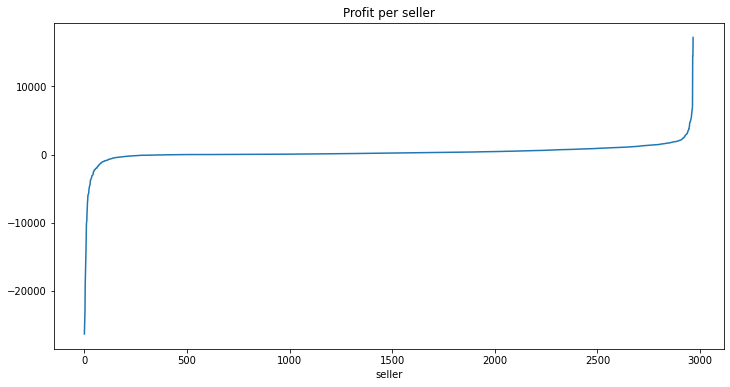

In [42]:
plt.figure(figsize=(12,6))
seller_sorted.profit.plot()
plt.title('Profit per seller')
plt.xlabel('seller');

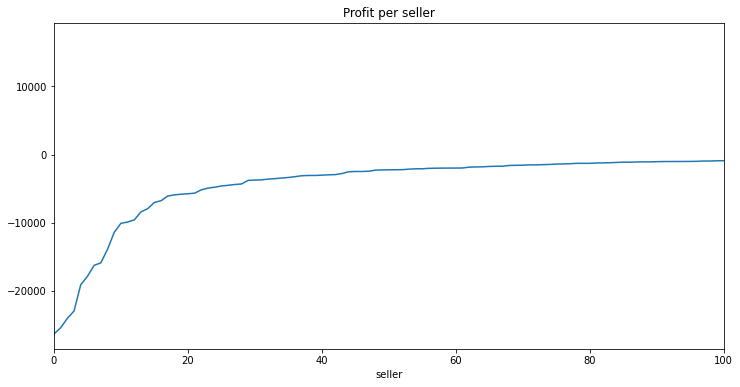

In [45]:
plt.figure(figsize=(12,6))
seller_sorted.profit.plot()
plt.title('Profit per seller')
plt.xlabel('seller')
plt.xlim(0,100);

In [49]:
seller_sorted[['profit']].abs().min()

profit    0.003
dtype: float64

In [56]:
seller_sorted.where(seller_sorted.any(0.003)

ValueError: No axis named 0.003 for object type DataFrame